In [23]:
from glob import glob

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, NullLocator
from matplotlib.dates import DayLocator, HourLocator

In [24]:
from src.data_cleaning import expand_to_full_length

In [25]:
# Get definitions
%run "00-definitions.ipynb"

MAX_GAP_TO_FILL = 4 

# Analyse cleaning of data

In [26]:
def plot_highest_errors(original: pd.DataFrame,
                        cleaned: pd.DataFrame,
                        nlargest=5):
    """Plot largest errors (default 5)"""
    
    original = original.dropna().tz_convert(None)
    cleaned = cleaned.dropna().tz_convert(None)

    DELTAT = pd.Timedelta(0.5, 'day')
    largest_errors = (original - cleaned).pow(2).nlargest(nlargest)
    fig, axs = plt.subplots(ncols=nlargest, sharey=True)
    for i in range(nlargest):
        ax = axs[i]
        time_range = slice(largest_errors.index[i] - DELTAT, largest_errors.index[i] + DELTAT)
        ax.plot(original[time_range].index, original[time_range],
                '--', label='raw')
        ax.plot(cleaned[time_range].index, cleaned[time_range], 
                '-', label='cleaned')
        ax.set_xlabel('')
        ax.xaxis.set_major_locator(DayLocator())
        ax.xaxis.set_minor_locator(HourLocator())
        #ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
        #plt.setp(ax.get_xticklabels(), rotation=45)
    axs[-1].legend()
    fig.suptitle(original.name);

## Onshore wind

In [27]:
raw_data = pd.read_csv('../data/raw/ENTSO-E_TP/ENTSO-E_TP_generation_Wind Onshore.csv', index_col=0, parse_dates=True)
for other_src_path in glob('../data/raw/others/*_generation_Wind Onshore.csv'):
    other_source = pd.read_csv(other_src_path, 
                                index_col=0, parse_dates=True)
    for col, ts in other_source.iteritems(): 
        raw_data[col] = ts
cleaned_data = pd.read_csv('../data/intermediate/Generation Wind Onshore.csv', index_col=0, parse_dates=True)
statistics = pd.read_csv('../data/intermediate/Statistics generation Wind Onshore.csv', index_col=0)
statistics.sort_values('NRMSE of filter')

,expanded length,original coverage,missing values,interpolated coverage,NRMSE of filter
PT,35040.0,0.998288,56.0,0.998402,0.004017
SE,8760.0,0.999886,1.0,0.999886,0.004231
DE,8760.0,0.999886,0.0,1.000000,0.005049
ES,8760.0,0.999886,0.0,1.000000,0.006412
FR,8760.0,0.999543,0.0,1.000000,0.007091
FI,8760.0,0.999772,2.0,0.999772,0.008972
AT,35040.0,1.000000,0.0,NaN,0.014155
US-TX,8760.0,0.981164,20.0,0.997717,0.014545
IE,17520.0,0.999429,0.0,1.000000,0.015652
NL,35040.0,0.999658,0.0,1.000000,0.020390


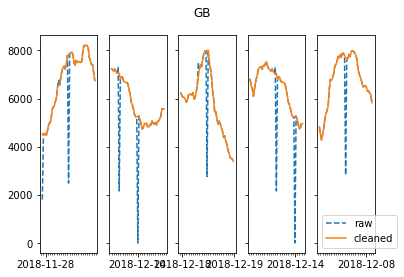

In [28]:
plot_highest_errors(raw_data['GB'], cleaned_data['GB'])

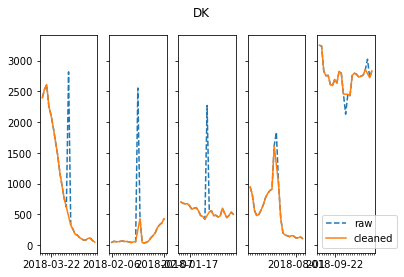

In [29]:
plot_highest_errors(raw_data['DK'], cleaned_data['DK'])

## Onshore wind forecast

In [30]:
raw_data = pd.read_csv('../data/raw/ENTSO-E_TP/ENTSO-E_TP_forecast_Wind Onshore.csv', index_col=0, parse_dates=True)
for other_src_path in glob('../data/raw/others/*_forecast_Wind Onshore.csv'):
    other_source = pd.read_csv(other_src_path, 
                                index_col=0, parse_dates=True)
    for col, ts in other_source.iteritems(): 
        raw_data[col] = ts
cleaned_data = pd.read_csv('../data/intermediate/Forecast Wind Onshore.csv', index_col=0, parse_dates=True)
statistics = pd.read_csv('../data/intermediate/Statistics forecast Wind Onshore.csv', index_col=0)
statistics.sort_values('NRMSE of filter')

,expanded length,original coverage,missing values,interpolated coverage,NRMSE of filter
DE,35040.0,0.986301,460.0,0.986872,0.001254
GB,17520.0,1.000000,0.0,NaN,0.004369
ES,8760.0,1.000000,0.0,NaN,0.004488
NL,35040.0,0.997260,92.0,0.997374,0.004854
AT,35040.0,1.000000,0.0,NaN,0.006092
BE,8760.0,1.000000,0.0,NaN,0.008925
FR,8760.0,0.996689,21.0,0.997603,0.014307
IE,8760.0,0.997260,20.0,0.997717,0.014767
FI,8760.0,0.997260,18.0,0.997945,0.014943
DK,8760.0,1.000000,0.0,NaN,0.017154


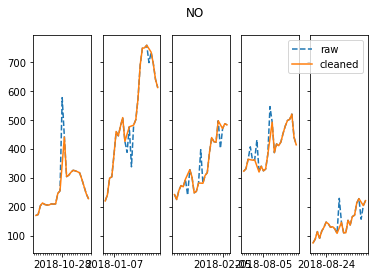

In [31]:
plot_highest_errors(raw_data['NO'], cleaned_data['NO'])

## Load

In [32]:
raw_data = pd.read_csv('../data/raw/ENTSO-E_TP/ENTSO-E_TP_load.csv', index_col=0, parse_dates=True)
for other_src_path in glob('../data/raw/others/*_load.csv'):
    other_source = pd.read_csv(other_src_path, 
                                index_col=0, parse_dates=True)
    for col, ts in other_source.iteritems(): 
        raw_data[col] = ts
cleaned_data = pd.read_csv('../data/intermediate/Load.csv', index_col=0, parse_dates=True)
statistics = pd.read_csv('../data/intermediate/Statistics load.csv', index_col=0)
statistics.sort_values('NRMSE of filter')

,expanded length,original coverage,missing values,interpolated coverage,NRMSE of filter
NL,35040.0,1.000000,0.0,NaN,0.000325
IE,17520.0,0.998744,0.0,1.000000,0.000867
GB-NIR,17520.0,0.999772,0.0,1.000000,0.000883
AT,35040.0,1.000000,0.0,NaN,0.000982
PT,8760.0,1.000000,0.0,NaN,0.001248
DE,35040.0,0.747317,8844.0,0.747603,0.001279
IT,8760.0,1.000000,0.0,NaN,0.001327
BE,35040.0,1.000000,0.0,NaN,0.002032
FI,8760.0,0.999658,0.0,1.000000,0.002075
FR,8760.0,0.997945,1.0,0.999886,0.004434


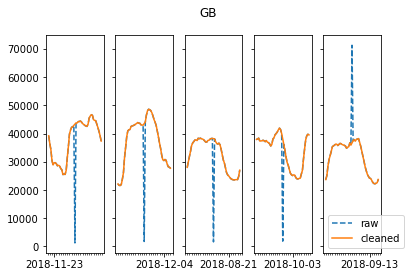

In [33]:
plot_highest_errors(raw_data['GB'], cleaned_data['GB'])

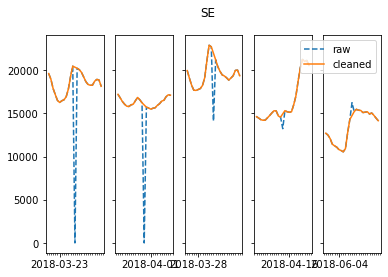

In [34]:
plot_highest_errors(raw_data['SE'], cleaned_data['SE'])

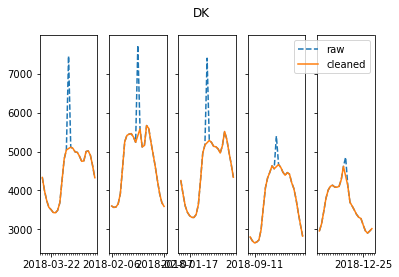

In [35]:
plot_highest_errors(raw_data['DK'], cleaned_data['DK'])